<IPython.core.display.Javascript object>


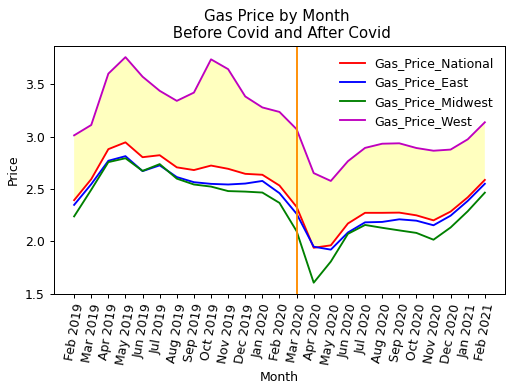

<IPython.core.display.Javascript object>


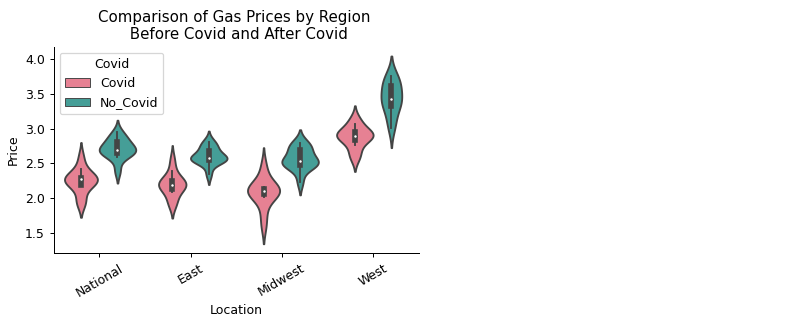

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

df_national = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\UM Data Science in Python\Data Visualization\U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices _Monthly.csv", 
                               skiprows=4, nrows=25)
df_national.columns = ["Month", "Gas_Price_National"]

df_east = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\UM Data Science in Python\Data Visualization\East_Coast_All_Grades_All_Formulations_Retail_Gasoline_Prices.csv", 
                               skiprows=4, nrows=25)
df_east.columns = ["Month", "Gas_Price_East"]

df_midwest = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\UM Data Science in Python\Data Visualization\Midwest_All_Grades_All_Formulations_Retail_Gasoline_Prices.csv", 
                               skiprows=4, nrows=25)
df_midwest.columns = ["Month", "Gas_Price_Midwest"]

df_west = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\UM Data Science in Python\Data Visualization\West_Coast_All_Grades_All_Formulations_Retail_Gasoline_Prices.csv", 
                               skiprows=4, nrows=25)
df_west.columns = ["Month", "Gas_Price_West"]

df1 = pd.merge(df_national, df_east, on="Month")
df2 = pd.merge(df_midwest, df_west, on="Month")
df_all = pd.merge(df1, df2, on="Month")
df_all = df_all.reindex(index=df_all.index[::-1]).reset_index(drop = True)
plt.figure()
ax1 = plt.subplot(1, 1, 1)
plt.xticks(range(0,len(df_all.Month)), df_all.Month, rotation=80)


plt.plot(dpi=100, figsize=(12,10))
plt.plot(df_all['Gas_Price_National'],c= 'r', label='Gas_Price_National')
plt.plot(df_all['Gas_Price_East'], c = 'b', label='Gas_Price_East')
plt.plot(df_all['Gas_Price_Midwest'], c = 'g', label='Gas_Price_Midwest')
plt.plot(df_all['Gas_Price_West'], c = 'm', label='Gas_Price_West')
plt.legend(frameon=False, loc=0)
plt.axvline(x=13,color="darkorange")
plt.fill_between(range(len(df_all.Month)), df_all['Gas_Price_West'], df_all['Gas_Price_National'], facecolor='yellow', alpha=0.25)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Gas Price by Month \n Before Covid and After Covid')
plt.tight_layout()


import seaborn
fig, ax = plt.subplots(figsize=(10,4))
df_covid = df_all.iloc[13:,]
df_covid.columns = ["Month", "National_Covid", "East_Covid", "Midwest_Covid", "West_Covid"]
df_covid = df_covid.drop('Month',axis=1)

df_covid_N= df_covid.loc[:,["National_Covid"]]
df_covid_N.columns=["Price"]
df_covid_N['Region']='National'
df_covid_N['Covid']='Covid'

df_covid_E= df_covid.loc[:,["East_Covid"]]
df_covid_E.columns=["Price"]
df_covid_E['Region']='East'
df_covid_E['Covid']='Covid'

df_covid_M= df_covid.loc[:,["Midwest_Covid"]]
df_covid_M.columns=["Price"]
df_covid_M['Region']='Midwest'
df_covid_M['Covid']='Covid'

df_covid_W= df_covid.loc[:,["West_Covid"]]
df_covid_W.columns=["Price"]
df_covid_W['Region']='West'
df_covid_W['Covid']='Covid'

df_covid_N = df_covid_N.append(df_covid_E, ignore_index = True)
df_covid_N = df_covid_N.append(df_covid_M, ignore_index = True)
df_covid_N = df_covid_N.append(df_covid_W, ignore_index = True)

df_nocovid = df_all.iloc[:12,]
df_nocovid.columns = ["Month1", "National_NoCovid", "East_NoCovid", "Midwest_NoCovid", "West_NoCovid"]
df_nocovid = df_nocovid.drop('Month1',axis=1)

df_nocovid_N= df_nocovid.loc[:,["National_NoCovid"]]
df_nocovid_N.columns=["Price"]
df_nocovid_N['Region']='National'
df_nocovid_N['Covid']='No_Covid'

df_nocovid_E= df_nocovid.loc[:,["East_NoCovid"]]
df_nocovid_E.columns=["Price"]
df_nocovid_E['Region']='East'
df_nocovid_E['Covid']='No_Covid'

df_nocovid_M= df_nocovid.loc[:,["Midwest_NoCovid"]]
df_nocovid_M.columns=["Price"]
df_nocovid_M['Region']='Midwest'
df_nocovid_M['Covid']='No_Covid'

df_nocovid_W= df_nocovid.loc[:,["West_NoCovid"]]
df_nocovid_W.columns=["Price"]
df_nocovid_W['Region']='West'
df_nocovid_W['Covid']='No_Covid'

df_nocovid_N = df_nocovid_N.append(df_nocovid_E, ignore_index = True)
df_nocovid_N = df_nocovid_N.append(df_nocovid_M, ignore_index = True)
df_nocovid_N = df_nocovid_N.append(df_nocovid_W, ignore_index = True)

df_covid_N = df_covid_N.append(df_nocovid_N, ignore_index = True)

plt.subplot(121)
plt.xticks(rotation=30)

ax = sns.violinplot(x="Region", y="Price", hue="Covid",
                    data=df_covid_N, palette="husl")

plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Comparison of Gas Prices by Region \n Before Covid and After Covid')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()


In [9]:
C = df_covid_N[(df_covid_N['Region'] == 'National') & (df_covid_N['Covid'] == 'Covid')]
X = C['Price']

NC = df_covid_N[(df_covid_N['Region'] == 'National') & (df_covid_N['Covid'] == 'No_Covid')]
y = NC['Price']
y = list(y)

#find variance for each group
print(np.var(X), np.var(y))

0.02841752083333332 0.01929324305555555


In [10]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(X, y, equal_var=True)

Ttest_indResult(statistic=-7.0504691927806515, pvalue=4.4977884471470394e-07)